In [118]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


from scipy.io import loadmat
from sklearn.metrics.cluster import adjusted_rand_score

# Implement K-means clustering methods

In [18]:

# calculate disntance between points. 
def euclidean_distance(point_a, point_b):
    return np.sqrt((point_a[0]-point_b[0])**2+(point_a[1]-point_b[1])**2+(point_a[2]-point_b[2])**2)

# Calculate the center of a list of points
def calculate_center(list_points):
    num_points = list_points.shape[0]
    x_coordinate = list_points[:,0].sum() / num_points
    y_coordinate = list_points[:,1].sum() / num_points
    z_coordinate = list_points[:,2].sum() / num_points
    return np.array([x_coordinate, y_coordinate, z_coordinate])

In [51]:
#return the position of the closest cluster center to the point
def closest_cluster_to_point(point, cluster_centers):
    
    min_dist=9999999999999999999 # min distance
    closest_center_pos = -1 # closest center
    
    # iterate the centers
    counter=0
    for center in cluster_centers:
        dist = euclidean_distance(point, center) # calculate distance
        if dist < min_dist: # if distance is smaller than min distance
            min_dist=dist # update the min dist
            closest_center_pos = counter # update the closest center
            
        counter+=1 # increase counter
    return closest_center_pos


# Main algorithm   
def k_means_clustering(points, k=16, snapshot_step=100):
    # Track the centers
    cluster_center_backlog =[]
    
    
    #Convert the points to pandas df
    points_df = pd.DataFrame(points, columns=['x','y','z'])
    #points_df['Current_cluster'] = -1

    
    # Create k random centers
    x_center = np.random.uniform(low=points[:,0].min()*0.9, high=points[:,0].max()*1.1, size=k)# Create x coord
    y_center = np.random.uniform(low=points[:,1].min()*0.9, high=points[:,1].max()*1.1, size=k)# create y coord
    z_center = np.random.uniform(low=points[:,2].min()*0.9, high=points[:,2].max()*1.1, size=k)# create z coord
    k_centers = np.array([x_center, y_center, z_center]) # join them
    k_centers = np.moveaxis(k_centers, 0, -1) # Rearange the axis
    
    
    for iteration in range(1000):
        print("Iter: " +str(iteration))
        # Calculate closest k-centers to each point
        closest_cluster=[]
        for point in points:
            #print(point)
            # Closest cluster to point
            closest_cluster_center_pos = closest_cluster_to_point(point, k_centers)
            closest_cluster.append(closest_cluster_center_pos)
        points_df['Current_cluster'] = closest_cluster # Update the current_clusters
        
        # Save clusters after each 100 iteration
        if(iteration%snapshot_step==0):
            points_df['Iter_' + str(iteration)] = closest_cluster
            cluster_center_backlog.append(k_centers)
        
        #Calculate new clusters centers
        new_k_centers = []
        same_center=True
        for pos, elem in enumerate(k_centers):
            # get the points for the given cluster
            cluster_points = points_df[points_df['Current_cluster'] == pos][['x', 'y', 'z']].to_numpy() 
            #print(cluster_points.shape)
            num_cluster_points = cluster_points.shape[0]# get the number of points in the cluster
            
            if(num_cluster_points != 0):
                # calculate new center
                new_center = calculate_center(cluster_points)
                
                if(same_center):# Only check if so far everypoint is the same
                    same_center = np.array_equal(new_center, elem)# Compare if the new center is the same as before
                
                new_k_centers.append([new_center[0],new_center[1],new_center[2]])
            else:
                # No point in cluster, keep the same center
                new_k_centers.append([elem[0],elem[1],elem[2]])
            
        if(same_center):
            # If no center has change, then we break
            break
        
        k_centers = np.array(new_k_centers) # Update the centers
        
        #break
    
    return (points_df, k_centers, cluster_center_backlog)

# Load data.mat and then perform K-means of x, show the intermediate figures, e.g., iteration = 100, 200, 300, ...

### Open file

In [56]:

# Open the model
annots = loadmat('data.mat')
#print(annots)

In [54]:
points = annots['x']
labels = annots['labels']
print(points)
print(labels)

[[ -6.43722296   3.18101549 -17.335989  ]
 [ -6.25938606   4.16817427 -16.65074539]
 [ -6.18147945   3.52396321 -18.52364159]
 ...
 [-12.71801758  -3.43591189 -19.51721573]
 [-12.91730499  -4.49972677 -19.46168327]
 [-13.76065731  -3.74603367 -19.9107914 ]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 4]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 6]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 7]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8

### calculate clusters

In [110]:

# Calculate the clusters
dataframe, latest_centers, centers_hist = k_means_clustering(points, k=32, snapshot_step=1)
dataframe

Iter: 0
Iter: 1
Iter: 2
Iter: 3
Iter: 4
Iter: 5
Iter: 6
Iter: 7
Iter: 8
Iter: 9
Iter: 10
Iter: 11
Iter: 12
Iter: 13


,x,y,z,Current_cluster,Iter_0,Iter_1,Iter_2,Iter_3,Iter_4,Iter_5,Iter_6,Iter_7,Iter_8,Iter_9,Iter_10,Iter_11,Iter_12,Iter_13
0,-6.437223,3.181015,-17.335989,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,-6.259386,4.168174,-16.650745,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,-6.181479,3.523963,-18.523642,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,-5.625355,3.257745,-16.598618,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,-4.879945,4.371672,-17.869738,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,-13.044223,-3.960357,-18.209320,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
494,-12.920800,-3.166895,-18.112057,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
495,-12.718018,-3.435912,-19.517216,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
496,-12.917305,-4.499727,-19.461683,3,3,26,3,3,3,3,3,3,3,3,3,3,3,3


### Plot Real Clusters and predicted clusters

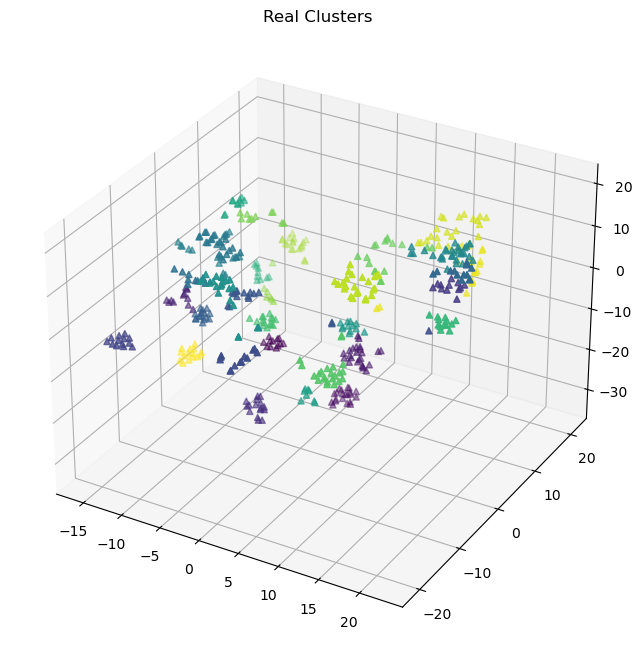

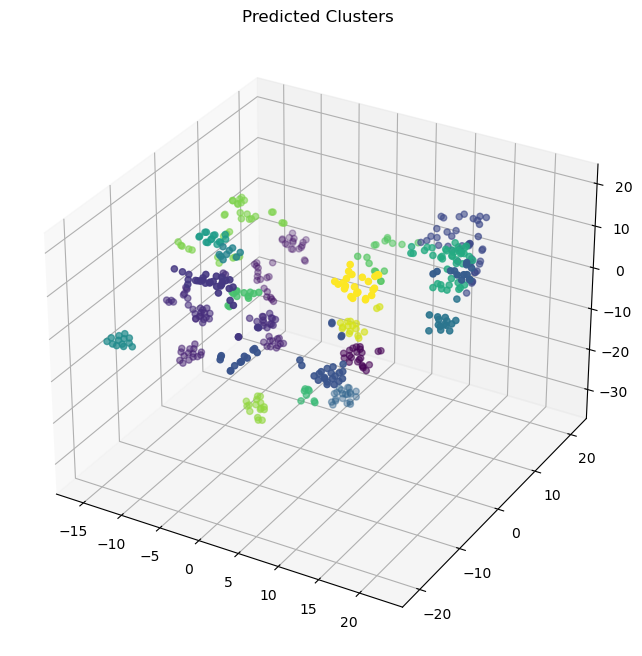

In [111]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, marker='^')

plt.title('Real Clusters')
plt.show()


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(dataframe['x'], dataframe['y'], dataframe['z'], c=dataframe['Current_cluster'])
plt.title('Predicted Clusters')
plt.show()

### Plot History of clusters

In [112]:
dataframe

,x,y,z,Current_cluster,Iter_0,Iter_1,Iter_2,Iter_3,Iter_4,Iter_5,Iter_6,Iter_7,Iter_8,Iter_9,Iter_10,Iter_11,Iter_12,Iter_13
0,-6.437223,3.181015,-17.335989,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,-6.259386,4.168174,-16.650745,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,-6.181479,3.523963,-18.523642,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,-5.625355,3.257745,-16.598618,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,-4.879945,4.371672,-17.869738,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,-13.044223,-3.960357,-18.209320,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
494,-12.920800,-3.166895,-18.112057,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
495,-12.718018,-3.435912,-19.517216,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
496,-12.917305,-4.499727,-19.461683,3,3,26,3,3,3,3,3,3,3,3,3,3,3,3


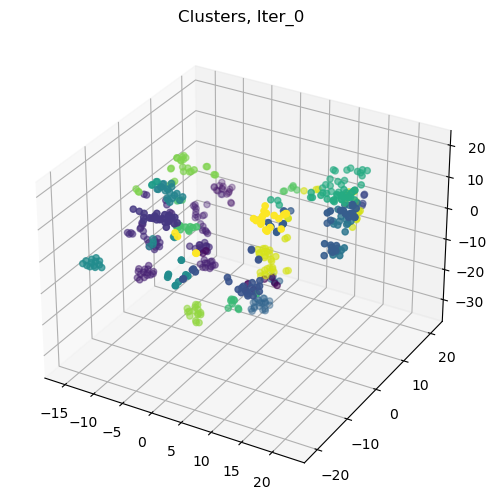

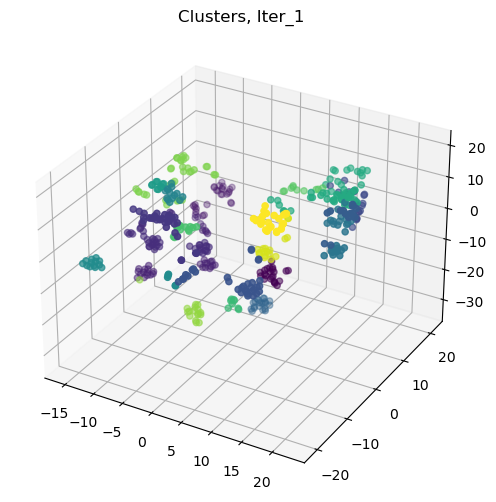

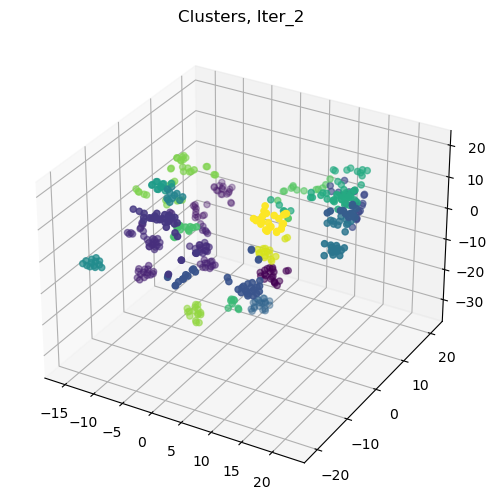

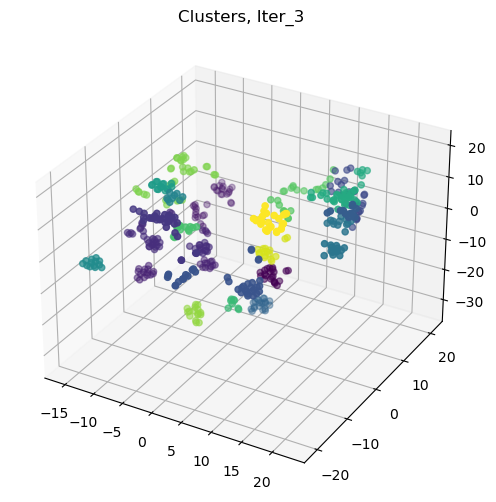

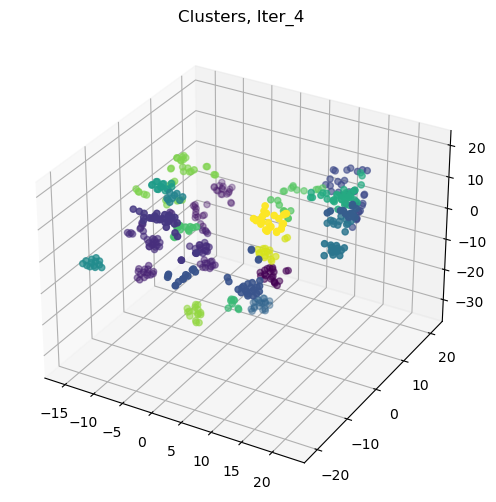

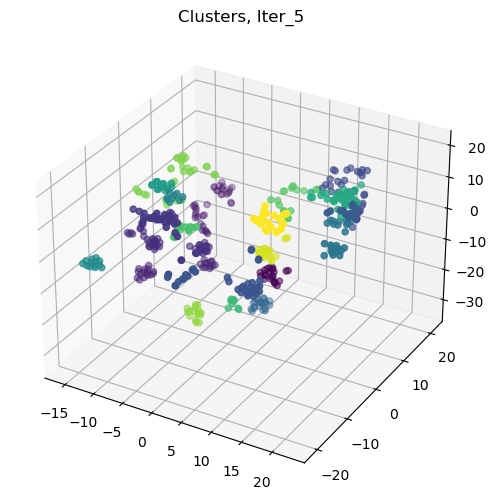

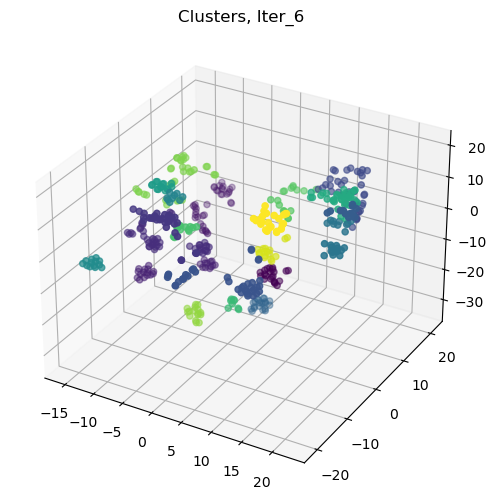

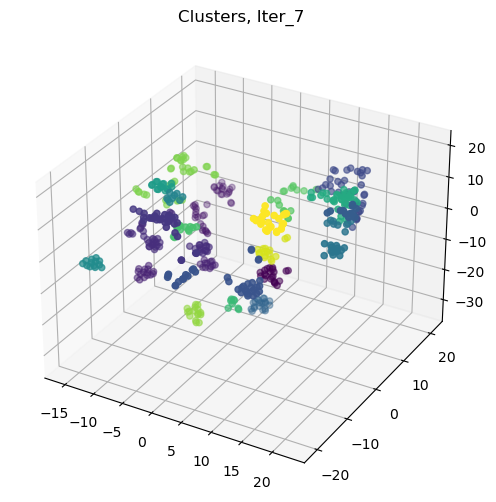

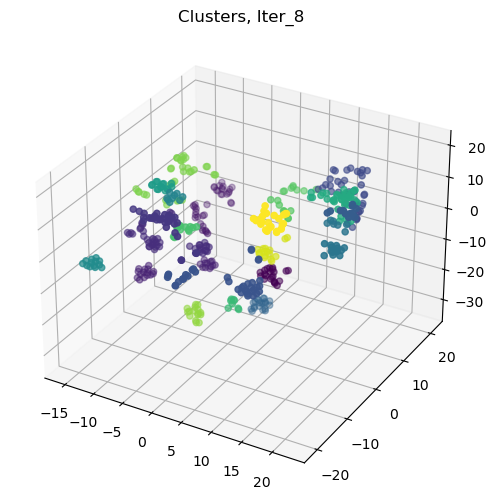

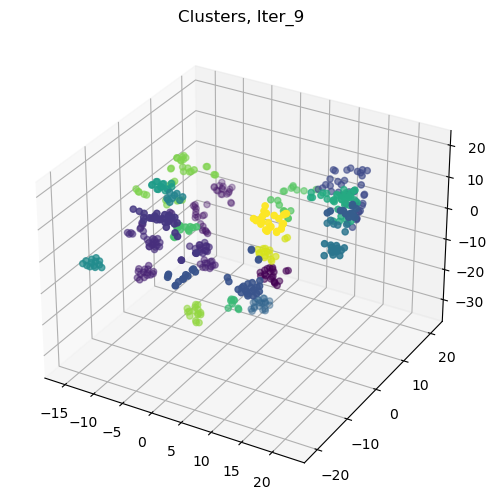

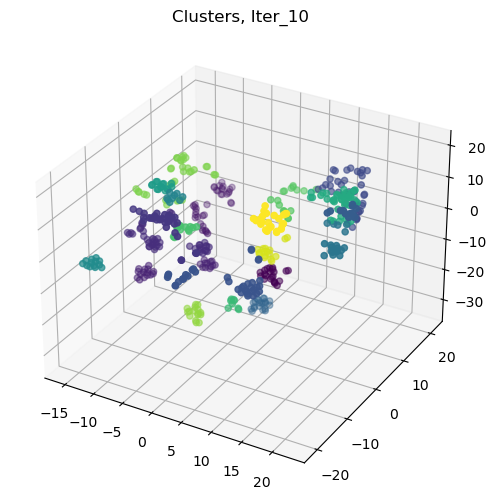

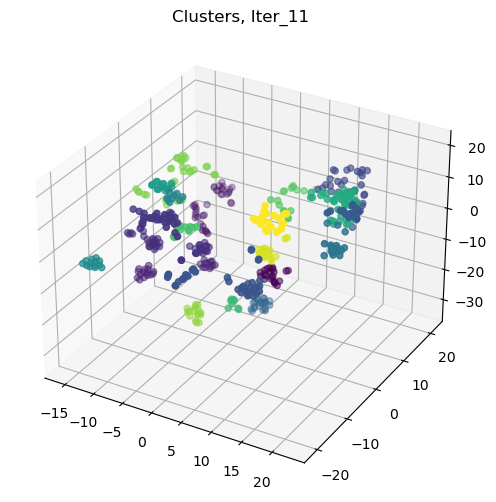

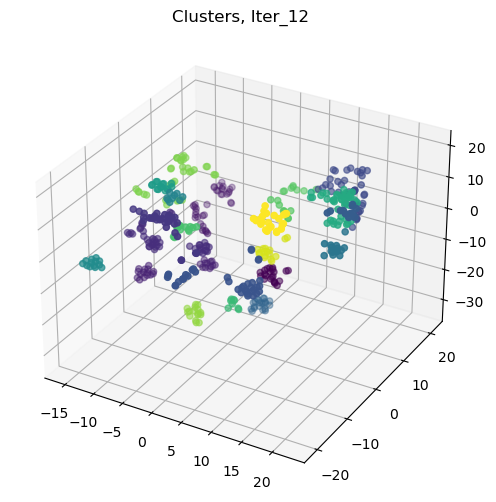

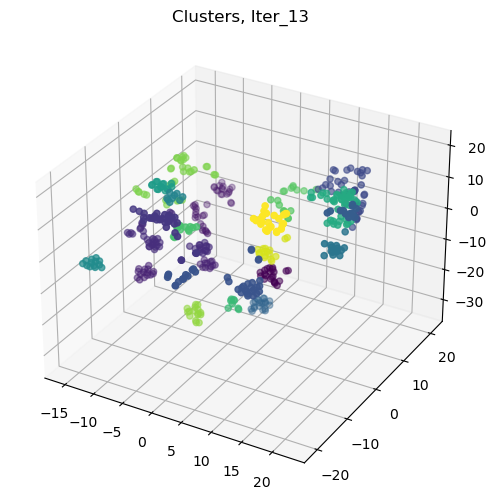

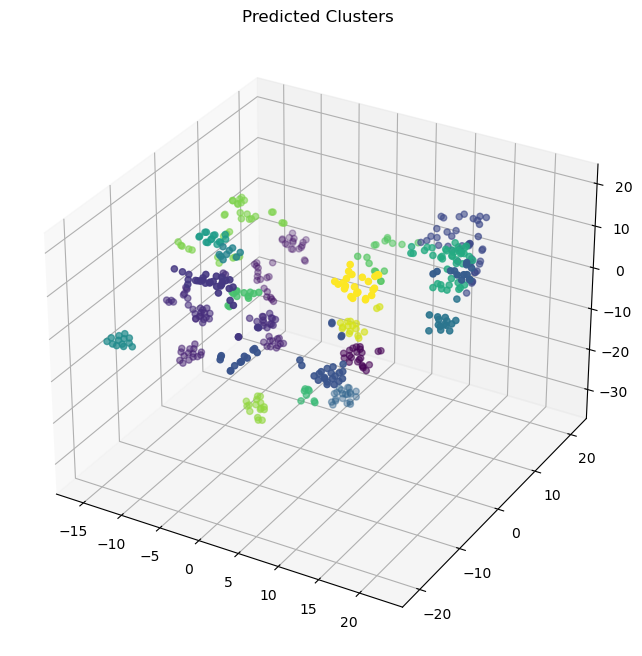

In [113]:
iterations_col_names = dataframe.filter(like='Iter_').columns
iterations_col_names
for name in iterations_col_names:
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(dataframe['x'], dataframe['y'], dataframe['z'], c=dataframe[name])
    plt.title('Clusters, ' + name)
    plt.show()

    
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(dataframe['x'], dataframe['y'], dataframe['z'], c=dataframe['Current_cluster'])
plt.title('Predicted Clusters')
plt.show()

# Calculate the accuracy using labels

In [114]:
labels
labels_2 = np.moveaxis(labels, 0, -1)[0]
labels_2

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15

In [115]:
predictions = np.array(dataframe['Current_cluster'])
predictions

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 29, 29,  0,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       12, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15,  8,  8,  8, 12,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8, 22, 22,  8,  8, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 14, 14, 14, 14, 14, 14, 14, 14, 14, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25,  4,  4,  4, 25, 25, 25, 19, 19, 19, 19,
       19, 19, 19, 19, 19

In [117]:

accuracy = adjusted_rand_score(labels_2.tolist(),predictions.tolist())
print(accuracy)

0.6616757383826172
